In [1]:
from jax import numpy as jnp
import numpy as np

from jax import random as rand
from jax import nn

from rockpool.devices.dynapse.config.weights import WeightParameters
from rockpool.nn.modules.native.linear import kaiming

# - Plotting imports and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

Could not import package: No module named 'iaf_nest'


In [2]:
bitmask = np.array(
    [
        [
            [14, 4, 3, 7],
            [7, 2, 7, 2],
            [10, 14, 8, 13],
            [10, 9, 1, 8],
            [4, 15, 11, 7],
        ],
        [
            [9, 11, 10, 13],
            [12, 7, 6, 11],
            [4, 6, 2, 11],
            [10, 5, 13, 4],
            [7, 3, 10, 3],
        ],
        [
            [10, 1, 1, 12],
            [14, 15, 0, 5],
            [14, 11, 9, 0],
            [12, 10, 10, 9],
            [4, 14, 9, 3],
        ],
    ]
)
wc_custom = WeightParameters(None, 1e-6, 2e-6, 4e-6, 8e-6, jnp.array(bitmask))

In [3]:
wc_custom.weight_matrix()

DeviceArray([[[1.3999999e-05, 4.0000000e-06, 3.0000001e-06,
               6.9999996e-06],
              [6.9999996e-06, 2.0000000e-06, 6.9999996e-06,
               2.0000000e-06],
              [9.9999997e-06, 1.3999999e-05, 8.0000000e-06,
               1.3000000e-05],
              [9.9999997e-06, 9.0000003e-06, 1.0000000e-06,
               8.0000000e-06],
              [4.0000000e-06, 1.5000000e-05, 1.1000000e-05,
               6.9999996e-06]],

             [[9.0000003e-06, 1.1000000e-05, 9.9999997e-06,
               1.3000000e-05],
              [1.2000000e-05, 6.9999996e-06, 6.0000002e-06,
               1.1000000e-05],
              [4.0000000e-06, 6.0000002e-06, 2.0000000e-06,
               1.1000000e-05],
              [9.9999997e-06, 4.9999999e-06, 1.3000000e-05,
               4.0000000e-06],
              [6.9999996e-06, 3.0000001e-06, 9.9999997e-06,
               3.0000001e-06]],

             [[9.9999997e-06, 1.0000000e-06, 1.0000000e-06,
               1.2000000e-

In [4]:
wc_custom.mse

DeviceArray(0., dtype=float32)

In [14]:
encoder, state, rec = wc_custom.fit(n_epoch=100000, 
    # optimizer="adam", 
    # step_size=lambda i: (1e-4 / (1.0 + 1e-4 * i))
    )

0.008970999


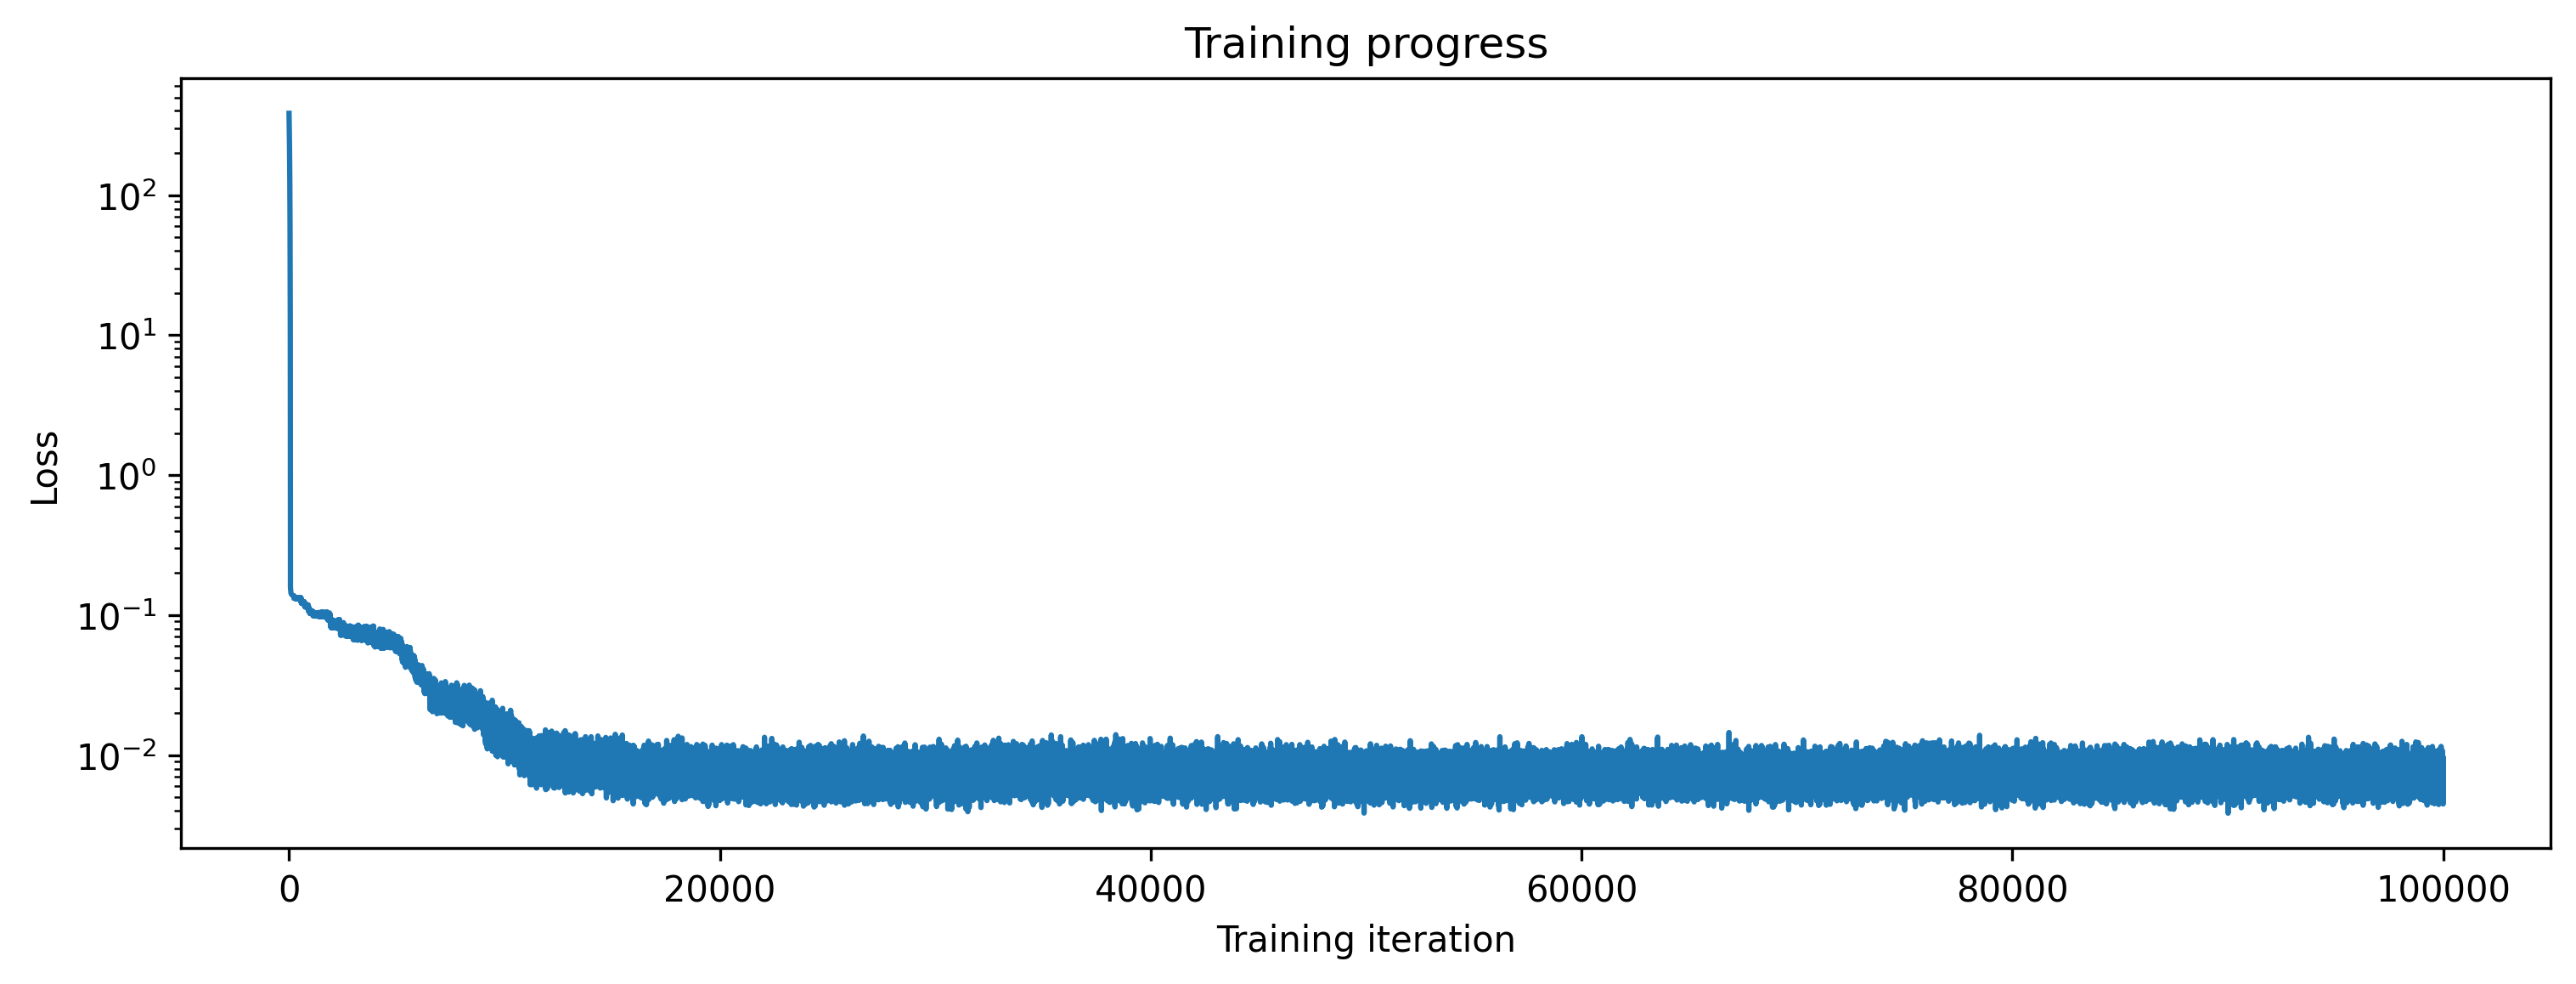

In [15]:
plt.figure()
plt.plot(rec["loss"])
plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Training iteration');
plt.title('Training progress');
print(rec["loss"][-1])

In [7]:
# sgd 0.067
# adagrad 0.085
# rmsprop 0.062
# adam 0.094
# adamax 0.044


In [8]:
encoder.code(wc_custom.w_flat) / wc_custom.transforms["scale"]

DeviceArray([3.5776040e-06, 3.1700281e-06, 3.4807924e-06, 3.1244826e-06],            dtype=float32)

In [9]:
wc_custom.w_flat

DeviceArray([0.93333334, 0.26666668, 0.20000002, 0.46666667, 0.46666667,
             0.13333334, 0.46666667, 0.13333334, 0.6666667 , 0.93333334,
             0.53333336, 0.86666673, 0.6666667 , 0.6000001 , 0.06666667,
             0.53333336, 0.26666668, 1.        , 0.7333334 , 0.46666667,
             0.6000001 , 0.7333334 , 0.6666667 , 0.86666673, 0.8000001 ,
             0.46666667, 0.40000004, 0.7333334 , 0.26666668, 0.40000004,
             0.13333334, 0.7333334 , 0.6666667 , 0.33333334, 0.86666673,
             0.26666668, 0.46666667, 0.20000002, 0.6666667 , 0.20000002,
             0.6666667 , 0.06666667, 0.06666667, 0.8000001 , 0.93333334,
             1.        , 0.33333334, 0.93333334, 0.7333334 , 0.6000001 ,
             0.8000001 , 0.6666667 , 0.6666667 , 0.6000001 , 0.26666668,
             0.93333334, 0.6000001 , 0.20000002], dtype=float32)

In [10]:
encoder(wc_custom.w_flat)

(DeviceArray([0.8901939 , 0.23205285, 0.21133523, 0.44680583, 0.4705598 ,
              0.20829886, 0.44984218, 0.21133523, 0.67885864, 0.8901939 ,
              0.44338807, 0.8901939 , 0.6516869 , 0.681895  , 0.        ,
              0.44035172, 0.20829886, 0.8901939 , 0.658141  , 0.44035172,
              0.681895  , 0.67885864, 0.6516869 , 0.8901939 , 0.8901939 ,
              0.44680583, 0.44035172, 0.6516869 , 0.21133523, 0.44984218,
              0.23850696, 0.6516869 , 0.6516869 , 0.44984218, 0.8901939 ,
              0.23205285, 0.4705598 , 0.23850696, 0.67885864, 0.23205285,
              0.67885864, 0.        , 0.        , 0.8901939 , 0.8901939 ,
              0.8901939 , 0.23850696, 0.8901939 , 0.6516869 , 0.6516869 ,
              0.658141  , 0.6516869 , 0.658141  , 0.658141  , 0.21133523,
              0.8901939 , 0.67885864, 0.21133523], dtype=float32),
 DeviceArray([0.23850696, 0.21133523, 0.23205285, 0.20829886], dtype=float32),
 DeviceArray([[1., 0., 0., 1., 1., 0., 1

In [11]:
bitmask

array([[[14,  4,  3,  7],
        [ 7,  2,  7,  2],
        [10, 14,  8, 13],
        [10,  9,  1,  8],
        [ 4, 15, 11,  7]],

       [[ 9, 11, 10, 13],
        [12,  7,  6, 11],
        [ 4,  6,  2, 11],
        [10,  5, 13,  4],
        [ 7,  3, 10,  3]],

       [[10,  1,  1, 12],
        [14, 15,  0,  5],
        [14, 11,  9,  0],
        [12, 10, 10,  9],
        [ 4, 14,  9,  3]]])

In [12]:
wc_custom.encode_bitmask(encoder.bitmask)

DeviceArray([15.,  4.,  2.,  9.,  5.,  8.,  3.,  2., 13., 15.,  6., 15.,
             14.,  7.,  0., 12.,  8., 15., 11., 12.,  7., 13., 14., 15.,
             15.,  9., 12., 14.,  2.,  3.,  1., 14., 14.,  3., 15.,  4.,
              5.,  1., 13.,  4., 13.,  0.,  0., 15., 15., 15.,  1., 15.,
             14., 14., 11., 14., 11., 11.,  2., 15., 13.,  2.],            dtype=float32)

In [13]:
encoder.w_en

DeviceArray([[ 6.79430887e-02, -7.25065917e-02,  9.55616310e-02,
               1.36115566e-01],
             [ 9.20697227e-02,  1.36304200e-01, -2.57683024e-02,
              -1.46760076e-01],
             [ 1.08277611e-01,  7.60719776e-02,  9.99261290e-02,
               1.13133155e-01],
             [-1.66754037e-01,  5.29750474e-02, -4.21013832e-02,
              -2.99463738e-02],
             [-8.69074017e-02, -6.83889389e-02, -8.76333844e-03,
               1.90276593e-01],
             [-2.77918763e-02, -1.40606835e-01,  8.70109573e-02,
              -1.64987907e-01],
             [ 6.06337674e-02,  7.56998509e-02,  5.56994677e-02,
               1.82560369e-01],
             [ 3.70550603e-02, -5.72490133e-02, -1.39906481e-01,
               1.41117528e-01],
             [-1.25279143e-01, -1.23605765e-01,  1.02209456e-01,
               7.40625560e-02],
             [-1.14904217e-01,  1.61157042e-01,  6.19032346e-02,
               1.96719661e-01],
             [-1.49907814e-02,